In [1]:
%matplotlib inline

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
mpl.style.use('seaborn-darkgrid')
mpl.rc('figure', figsize=(16, 10))
mpl.rc('font', size=16)

In [66]:
[0.2] * 3

[0.2, 0.2, 0.2]

[ 1.          0.66666667  0.33333333]


[None]

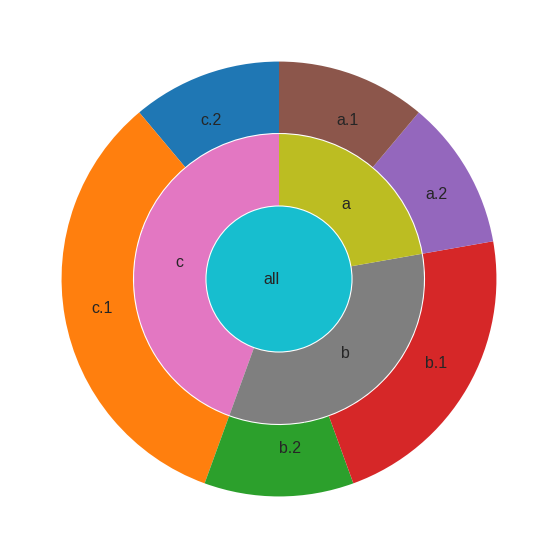

In [73]:
import numpy as np
import matplotlib.pyplot as plt


data = [
    [(1, 'all')],
    [(2, 'a'), (3, 'b'), (4, 'c')],
    [(1, 'a.1'), (1, 'a.2'), (2, 'b.1'), (1, 'b.2'), (3, 'c.1'), (1, 'c.2')],
]


fig, ax = plt.subplots()

radiuses = np.linspace(1, 0, len(data), endpoint=False)
print(radiuses)
for radius, level, i in zip(radiuses, reversed(data), range(len(data), 0, -1)):
    values, labels = zip(*reversed(level))
    labeldistance = 0 if i == 1 else 1 - 1 / i / 1.5
    ax.pie(values, radius=radius + 0.005, colors=['white'] * len(values))
    ax.pie(values, radius=radius, labels=labels, labeldistance=labeldistance, startangle=90)
    
ax.set(aspect='equal')

In [206]:
np.zeros(3) + 3 - 0.5

array([ 2.5,  2.5,  2.5])

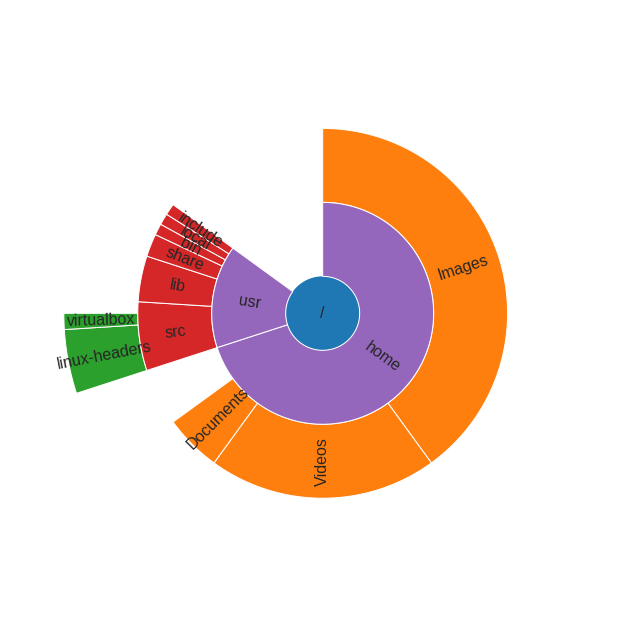

In [216]:
data = [
    ('/', 100, [
        ('home', 70, [
            ('Images', 40, []),
            ('Videos', 20, []),
            ('Documents', 5, []),
        ]),
        ('usr', 15, [
            ('src', 6, [
                ('linux-headers', 4, []),
                ('virtualbox', 1, []),

            ]),
            ('lib', 4, []),
            ('share', 2, []),
            ('bin', 1, []),
            ('local', 1, []),
            ('include', 1, []),
        ]),
    ]),
]


def sunburst(nodes, total=np.pi * 2, offset=0, level=0, ax=None):
    ax = ax or plt.subplot(111, projection='polar')

    if level == 0 and len(nodes) == 1:
        label, value, subnodes = nodes[0]
        ax.bar([0], [0.5], [np.pi * 2])
        ax.text(0, 0, label, ha='center', va='center')
        sunburst(subnodes, total=value, level=level + 1, ax=ax)
    elif nodes:
        d = np.pi * 2 / total
        labels = []
        widths = []
        local_offset = offset
        for label, value, subnodes in nodes:
            labels.append(label)
            widths.append(value * d)
            sunburst(subnodes, total=total, offset=local_offset, level=level + 1, ax=ax)
            local_offset += value
        values = np.cumsum([offset * d] + widths[:-1])
        heights = [1] * len(nodes)
        bottoms = np.zeros(len(nodes)) + level - 0.5
        rects = ax.bar(values, heights, widths, bottoms, linewidth=1, edgecolor='white', align='edge')
        for rect, label in zip(rects, labels):
            x = rect.get_x() + rect.get_width() / 2
            y = rect.get_y() + rect.get_height() / 2
            rotation = (90 + (360 - np.degrees(x) % 180)) % 360
            ax.text(x, y, label, rotation=rotation, ha='center', va='center') 

    if level == 0:
        ax.set_theta_direction(-1)
        ax.set_theta_zero_location('N')
        ax.set_axis_off()


sunburst(data)

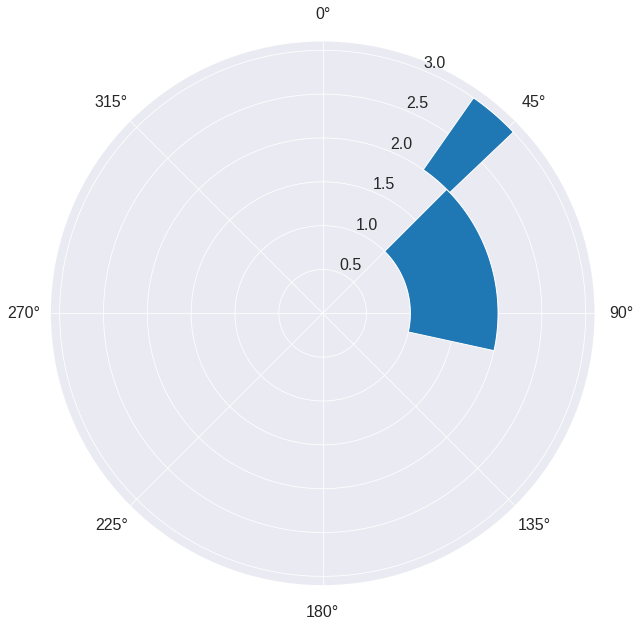

In [198]:
ax = plt.subplot(111, projection='polar')
values = [np.radians(45), np.radians(35)]
heights = [1, 1]
widths = [1, 0.2]
bottoms = [1, 2]
ax.bar(values, heights, widths, bottoms, linewidth=1, edgecolor='white', align='edge')
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')